In [1]:
%run ../utils/configuration.ipynb

In [ ]:
#Call common functions

%run ./0300_common_functions.ipynb

In [3]:
df=pd.read_parquet(train_model_path) 

In [4]:
df.head()

,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,...,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,population
0,1,2,1,17.22,0,1,2,21,1,1,...,0,4562.56,1,31,0,2.0,1,88,4026,29914
1,0,2,1,17.51,1,1,3,7,0,0,...,0,1630.31,0,76,0,2.0,1,91,5136,51213
2,5,2,1,26.64,0,1,1,61,1,0,...,0,6393.61,1,20,0,3.0,0,28,4515,1666
3,4,2,1,19.24,1,1,3,18,1,1,...,1,4577.04,0,54,0,3.0,0,25,4505,72199
4,1,2,1,33.25,1,1,3,26,0,1,...,0,5581.55,1,65,0,3.0,1,96,4687,32804


In [ ]:
# Apply feature selection for perspective 1

df_1 = apply_feature_selection(df, 1)
df_1.head()

,churn_value,number_of_referrals,contract,monthly_charge,age,number_of_dependents
0,1,1,2,60.30,31,0
1,1,0,1,84.75,76,0
2,0,5,2,73.05,20,0
3,0,4,3,106.05,54,0
4,1,1,1,105.65,65,0


In [ ]:
# Apply feature selection for perspective 2

df_2 = apply_feature_selection(df, 2)
df_2.head()

,churn_value,number_of_referrals,offer,online_security,online_backup,premium_tech_support,contract,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,1,2,1,1,0,2,0,60.30,3563.80,0.0,4562.56,31,0,29914
1,1,0,2,0,0,0,1,0,84.75,1350.15,0.0,1630.31,76,0,51213
2,0,5,2,1,0,0,2,0,73.05,4688.65,0.0,6393.61,20,0,1666
3,0,4,2,1,1,1,3,0,106.05,3834.40,0.0,4577.04,54,0,72199
4,1,1,2,0,1,0,1,0,105.65,4284.80,0.0,5581.55,65,0,32804


In [ ]:
# Apply feature selection for perspective 3

df_3 = apply_feature_selection(df, 3)
df_3.head()

,churn_value,number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,avg_monthly_gb_download,online_security,online_backup,premium_tech_support,streaming_music,contract,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_revenue,age,number_of_dependents,population
0,1,1,2,1,17.22,21,1,1,0,0,2,1,0,60.30,3563.80,0.0,4562.56,31,0,29914
1,1,0,2,1,17.51,7,0,0,0,0,1,0,0,84.75,1350.15,0.0,1630.31,76,0,51213
2,0,5,2,1,26.64,61,1,0,0,1,2,1,0,73.05,4688.65,0.0,6393.61,20,0,1666
3,0,4,2,1,19.24,18,1,1,1,1,3,1,0,106.05,3834.40,0.0,4577.04,54,0,72199
4,1,1,2,1,33.25,26,0,1,0,1,1,0,0,105.65,4284.80,0.0,5581.55,65,0,32804


In [ ]:
# Call KNN model

model_KNN = KNeighborsClassifier()

In [ ]:
#First testing perspective 1

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.73+/-0.0059,0.615+/-0.0226


In [ ]:
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_KNN))

precision_score
------------------------------------------


,Train,Validation
KNN,0.758+/-0.0074,0.646+/-0.0198


In [ ]:
# First testing perspective 2

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_2,f1_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.729+/-0.0063,0.615+/-0.0193


In [12]:
df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_1,f1_score, model_KNN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_1,precision_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


,Train,Validation
KNN,0.73+/-0.0059,0.615+/-0.0226


precision_score
------------------------------------------


,Train,Validation
KNN,0.758+/-0.0074,0.646+/-0.0198


In [ ]:
# First testing perspective 3

df_all = pd.DataFrame(columns = ['Train','Validation'], index = ['KNN'])
print('------------------------------------------')
print('f1_score')
print('------------------------------------------')
display(show_results(df_all, df_3,f1_score, model_KNN))
print('precision_score')
print('------------------------------------------')
display(show_results(df_all, df_3,precision_score, model_KNN))

------------------------------------------
f1_score
------------------------------------------


c:\Users\Danie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Danie\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Danie\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Danie\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Danie\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

,Train,Validation
KNN,0.736+/-0.0064,0.621+/-0.01


precision_score
------------------------------------------


,Train,Validation
KNN,0.764+/-0.006,0.645+/-0.0105


Model Optimization

In [ ]:
# Visualizing and evaluating the model with different perspectives

def point_plot(train, validation, values_try):
    sns.pointplot(x=values_try, y=train, color = 'teal', label = 'Train')
    sns.pointplot(x=values_try, y=validation, color = 'goldenrod', label = 'Validation')
    plt.legend()

In [15]:
def get_models_knn(data, values):
    models = dict()
    results_train, results_val, names = [],[],[]

    # create the instances of each model with different values
    for value in values:
        models['neighbors_' + str(value)] = KNeighborsClassifier(n_neighbors = value)

    for name, model in models.items():
        train_results, val_results  = select_best_models(data, model)
        avg_train, std_train, avg_val, std_val = apply_score(train_results, val_results, f1_score)
        results_train.append(avg_train)
        results_val.append(avg_val)
        names.append(name)

    print(results_train)
    print(results_val)

    return results_train, results_val

[0.994, 0.777, 0.73, 0.703, 0.693, 0.686, 0.677, 0.665, 0.66, 0.659]
[0.565, 0.6, 0.615, 0.617, 0.617, 0.614, 0.613, 0.616, 0.615, 0.621]


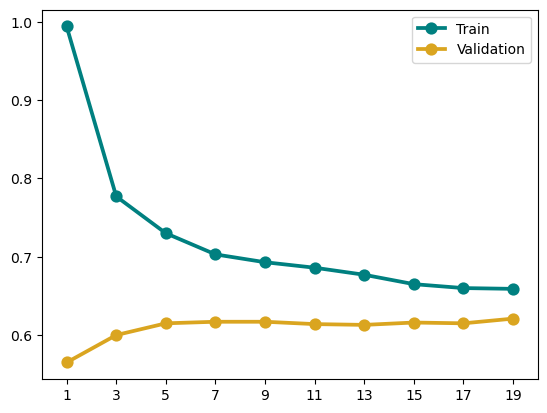

In [16]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_1, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.772, 0.729, 0.706, 0.69, 0.679, 0.672, 0.668, 0.665, 0.662]
[0.564, 0.601, 0.615, 0.621, 0.618, 0.618, 0.619, 0.626, 0.626, 0.628]


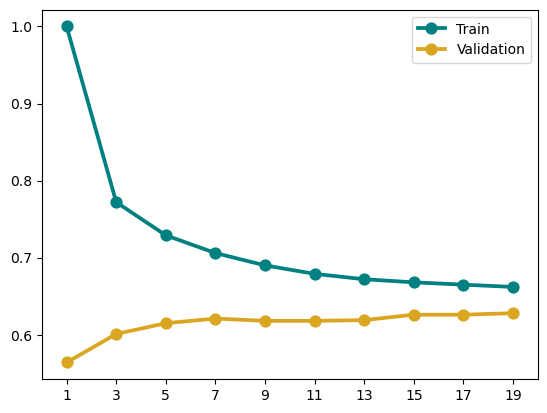

In [17]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_2, values_try)
point_plot(results_train, results_val, values_try)

[1.0, 0.788, 0.736, 0.702, 0.691, 0.688, 0.68, 0.674, 0.674, 0.671]
[0.585, 0.606, 0.621, 0.626, 0.623, 0.618, 0.628, 0.629, 0.63, 0.627]


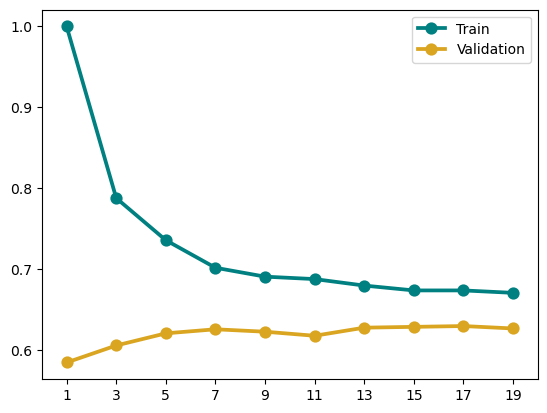

In [18]:
values_try = [1,3,5,7,9,11,13,15,17,19]
results_train, results_val = get_models_knn(df_3, values_try)
point_plot(results_train, results_val, values_try)